# Assignment 1 - CE 716 (14 Feb 2020)

In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import PIL

### Data Loading

In [2]:
data = gdal.Open('VOL-ALPSRP074050510-H1.1__A')

### Part 1 - Intensity  Image and Phase Image of Hometown

In [58]:
HH,HV = data.ReadAsArray()                 # HH and HV directly assigned as there are only 2 layers in data
print(HH.shape)
amplitude = np.absolute(HH)**2             # Aplitude after getting mod of complex numbert square
amplitude = np.log(amplitude)
phase = np.angle(HH,deg = True)            # Getting phase from HB layer
amplitude = amplitude[9000:11000,2000:2500]# Croping the image of interest
phase = phase[9000:11000,2000:2500]

(18432, 4640)


/home/vaibhav/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [59]:
amplitude.shape                            # New shape of image for better resolution

(2000, 500)

In [60]:
# HH = (HH - np.mean(HH)) / np.std(HH)     # Normalisation 

### Plotting the Final Image

(2000, 500)
(2000, 500)


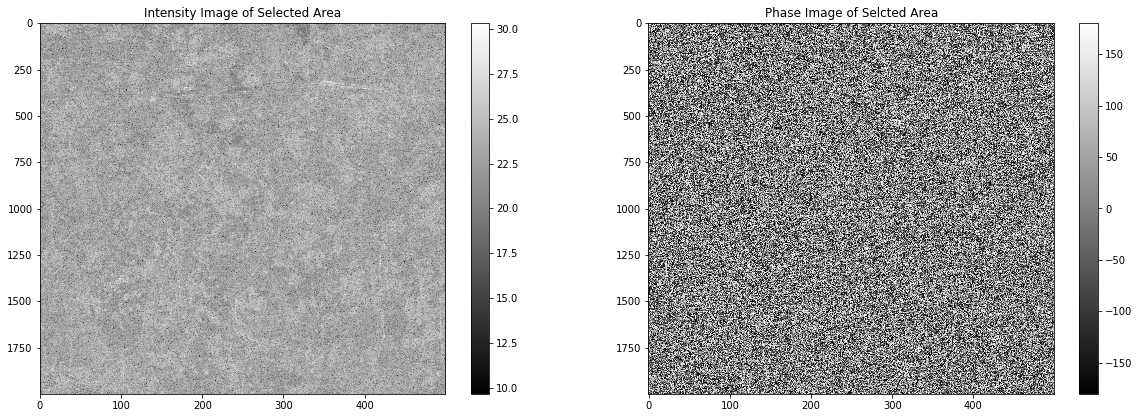

In [61]:
print(amplitude.shape)
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area")
plt.imshow(amplitude,cmap = "gray", aspect='auto')
plt.colorbar()

print(phase.shape)
plt.subplot(2,2,2)
plt.title("Phase Image of Selcted Area")
plt.imshow(phase ,cmap = "gray",aspect='auto')
plt.colorbar()

### Part 2 -  Radiometric Resolution

In [62]:
# Random bakchodi

### Part 3 -  Multi-looking image

In [63]:
def MultiLook(im,multlook_factor = 5):     # taking the multi-look factor for ALOS PALSAR to be 5
    
    new_im = np.arange(int(im.shape[0]/multlook_factor)*im.shape[1]).reshape(int(im.shape[0]/multlook_factor),im.shape[1])
    for y in range(0,im.shape[1]):
        pos = 0
        for x in range(0,im.shape[0],multlook_factor):
            temp = np.mean(im[x:x+multlook_factor,y])
            
            try:
                new_im[pos,y] = temp
            except IndexError:
                pass
            
            pos+=1
            
    return new_im    

### Printing image after Multi-looking

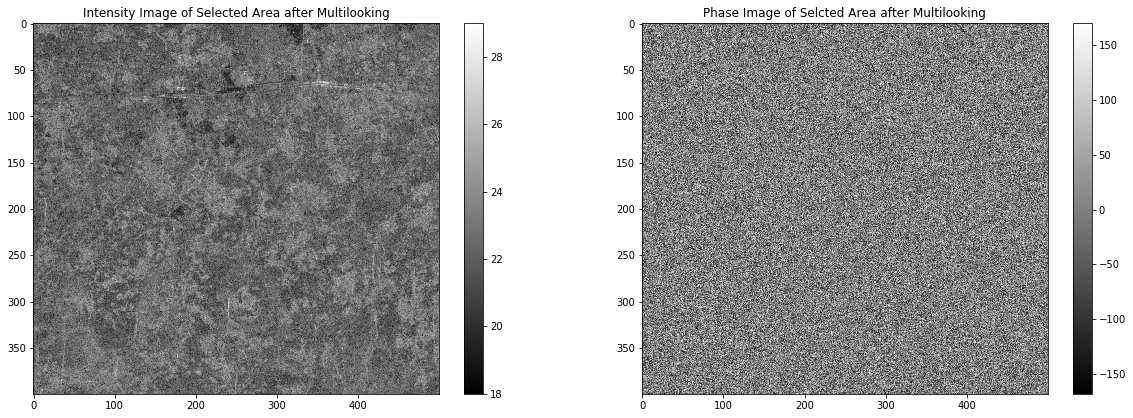

In [67]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.title("Intensity Image of Selected Area after Multilooking")
plt.imshow(MultiLook(amplitude),cmap = "gray", aspect='auto')
plt.colorbar()

plt.subplot(2,2,2)
plt.title("Phase Image of Selcted Area after Multilooking")
plt.imshow(MultiLook(phase) ,cmap = "gray",aspect='auto')
plt.colorbar()